# The Hénon-Heiles system

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
from matplotlib.patches import Circle


### Acknowledgements

[1]: Wikipedia: Hénon–Heiles system: <https://en.wikipedia.org/wiki/H%C3%A9non%E2%80%93Heiles_system>  
[2]: Wolfram Mathworld: <https://mathworld.wolfram.com/Henon-HeilesEquation.html>  
[3]: Mathematica StackExchange (Figure 1): <https://mathematica.stackexchange.com/questions/204648/evaluating-the-poincar%C3%A9-section-for-h%C3%A9non-heiles-potential-through-h%C3%A9non-method>  
[4]:QUML MTH739U Topics in Scientific Computing (Mathematica): https://2021.qmplus.qmul.ac.uk/course/view.php?id=18245  
[5]:Oxford Short Option (ASO): Functions of a complex variable: https://www-thphys.physics.ox.ac.uk/people/FrancescoHautmann/ComplexVariable/  

I want to particularly thank Yihong Wang for her help with Task 1.6, where she gave me the hint to find the relation between x and y rather than do the nasty calculation straightforward, and the guidance on Task 3.

I also used the AI Claude 3 on my code for Tasks 3 and 4, especially for debugging the escape time function.







### Background


The Hénon-Heiles equation is a nonlinear, nonintegrable Hamiltonian system that plays an important role in dynamical systems, mathematical physics, chaos theory, and numerical analysis. It was first introduced in 1962,while  Michel Hénon and Carl Heiles worked on the non-linear motion of a star around a galactic center with the motion restricted to a plane at the Princeton University. In this project, we focus on its application in the dynamical system and  examine the behaviour of a variant of the Hénon-Heiles system represented by these second-order differential equations:

$$
\ddot{x} = -x + x^2 - y^2
$$

$$
\ddot{y} = -y - 2xy
$$

where 

$$
\ddot{x} = -x + x^2 - y^2
$$

$$
\ddot{y} = -y - 2xy
$$
These equations can be reformulated as a quartet of first-order equations in the variables $(x, y, p, q)$ as follow:


$$
\dot{x} = p
$$

$$
\dot{y} = q
$$

$$
\dot{p} = -x + x^2 - y^2
$$

$$
\dot{q} = -y - 2xy
$$


<p align="center">
  <img src="https://i.stack.imgur.com/SYr4D.png" alt="An example of Poincaré Sections for spring pendulum" title="An example of Poincaré Sections for spring pendulum">
  <!-- 图像标题加粗并居中 -->
  <br>
  <strong>Figure 1: An example of Poincaré Sections for spring pendulum</strong>
</p>


### 1.1 Thereoms

The Hénon-Heiles system comprises a triplet of equations, corresponding respectively to potential energy (V), kinetic energy (T), and total energy (E), and is framed within **Hamiltonian mechanics**.

$$
V = \frac{1}{2}x^2 + \frac{1}{2}y^2 + xy^2 - \frac{1}{3}x^3
$$

$$
T = \frac{1}{2}\dot{x}^2 + \frac{1}{2}\dot{y}^2 = \frac{1}{2}p^2 + \frac{1}{2}q^2
$$

$$
E = V + T （*)
$$


* Typically, we denote the total energy **E** as **H** for the Hamiltonian function in analytical dynamics and quantum physics.

### Task 1.2 (Energy Conservation)

To show the energy is conserved in the system, we need to demonstrate For $\frac{dE}{dt}$: 

\begin{align*}
V &= \frac{1}{2}x^2 + \frac{1}{2}y^2 + xy^2 - \frac{1}{3}x^3 & \tag{1} \\
T &= \frac{1}{2}\dot{x}^2 + \frac{1}{2}\dot{y}^2 = \frac{1}{2}p^2 + \frac{1}{2}q^2 & \tag{2} \\
E &= V + T & \tag{3} \\
\end{align*}

From (3), we can apply the time derivative:

\begin{align*}
\dot{E} &= \frac{dE}{dt} = \frac{d(V + T)}{dt} & \tag{4} \\
\end{align*}

By applying the chain rule:

\begin{align*}
\frac{dE}{dt} &= \frac{dV}{dt} + \frac{dT}{dt} & \tag{5}  \\
\end{align*}

For $\frac{dV}{dt}$:

\begin{align*}
\frac{dV}{dt} &= \frac{d}{dt} \left( \frac{1}{2}x^2 + \frac{1}{2}y^2 + xy^2 - \frac{1}{3}x^3 \right) \\
&= x\dot{x} + y\dot{y} + y^2\dot{x} - x^2\dot{x} \\
&= xp + yq + y^2p - x^2p \tag{6}\\
\end{align*}

For $\frac{dT}{dt}$: 

\begin{align*}
\frac{dT}{dt} &= \frac{d}{dt} \left( \frac{1}{2}p^2 + \frac{1}{2}q^2 \right) \\
&= p\dot{p} + q\dot{q} \\
&= p(-x + x^2 - y^2) + q(-y - 2xy) \\
&= -px + px^2 - py^2 - qy - 2qxy \tag{7}\\
\end{align*}

Combining the results from (6) and (7), we have:

\begin{align*}
\frac{dE}{dt} &= xp + yq + y^2p - x^2p - px + px^2 - py^2 - qy - 2qxy \\
&= 0 \quad \text{}
\end{align*}

$\frac{dE}{dt}$ = 0 as claimed




### Task 1.3 (Complex Variable Function )


####  (1) prove $\ddot{z} = -z + z\bar{z}$
The complex number is defined as $z=x+iy$



From the definitions:

$$
\dot{z} = \dot{x} + i\dot{y}\tag{1}
$$

$$
\ddot{z} = \ddot{x} + i\ddot{y}\tag{2}
$$

Given that:

$$
\ddot{x} = -x + x^2 - y^2\tag{3}
$$

$$
\ddot{y} = -y - 2xy\tag{4}
$$

Substitute (3) and (4) into $\ddot{z}$(2):

$$
\ddot{z} = (-x + x^2 - y^2) + i(-y - 2xy)\tag{5}
$$

Rewriting $x^2 - y^2$ and $2xy$ in terms of $z$ and $\bar{z}$ :

$$
x^2 - y^2 = \frac{z\bar{z} + \bar{z}z}{2}\tag{6}
$$

$$
2xy = \frac{z^2 - \bar{z}^2}{2i}\tag{7}
$$

Thus:

$$
\ddot{z} = -z + \frac{z\bar{z} + \bar{z}z}{2} - i\left(\frac{z^2 - \bar{z}^2}{2i}\right)\tag{8}
$$

$$
\ddot{z} = -z + z\bar{z}\tag{9}
$$

as claimed
          

####  (2) prove $V = \frac{1}{2} |z|^2 - \frac{1}{3} \Re(z^3)$



Given that:

$$
V = \frac{1}{2} (x^2 + y^2) + xy^2 - \frac{1}{3} x^3\tag{10}
$$

Rewriting and applying $z = x + iy$:

$$
x^2 + y^2 = |z|^2\tag{11}
$$

$$
xy^2 = \Re\left(x (iy)^2\right) = \Re\left(\frac{z\bar{z}^2}{2}\right)\tag{12}
$$

$$
x^3 = \Re(z^3)\tag{13}
$$

Substituting (13) in (10):

$$
V = \frac{1}{2} |z|^2 + \Re\left(\frac{z\bar{z}^2}{2}\right) - \frac{1}{3} \Re(z^3)\tag{14}
$$

$$
V = \frac{1}{2} |z|^2 - \frac{1}{3} \Re(z^3)\tag{15}
$$

as claimed

####  (3) prove $T = \frac{1}{2}|\dot{z}|^2$

From the given definitions:
$$
T = \frac{1}{2}(\dot{x}^2 + \dot{y}^2)\tag{16}
$$

From the equation $\dot{z} = \dot{x} + i\dot{y}$(1), we get:

$$
|\dot{z}|^2 = (\dot{x} + i\dot{y})(\dot{x} - i\dot{y}) = \dot{x}^2 + \dot{y}^2\tag{17}
$$
Thus,
$$
\dot{x}^2 + \dot{y}^2 = |\dot{z}|^2\tag{18}
$$

$$
T = \frac{1}{2}|\dot{z}|^2\tag{19}
$$

as claimed






### Task 1.4 (Stationary Points )

To get the stationary points, first, we need to let $\dot{x}$ $\dot{y}$ $\dot{p}$ $\dot{q}$ equal to 0. For $\dot{p}=0$:

$$
-x^2 + x - y^2 = 0 \tag{1}
$$


For $\dot{q}=0$:

$$
-y-2xy=-y(2x+1)=0 \tag{2}
$$

It is apparently to see that $y=0$,and $x = -\frac{1}{2}$ are the solutions for the equation (2). Let we first consider the case,$y=0$,when
we plug in this in equation (1). We get:

$$
-x + x^2 = 0 \tag{3}
$$

$$
x_0 =0 \\x_1=1
$$

From the result above, the stationary points $a_0=(0,0)$,and $a_1=(1,0)$ are obtained. Now,we consider $x = -\frac{1}{2}$.Let we plug this into $-x^2 + x - y^2 = 0$ (1) again,we obtain

$$
(-\frac{1}{2})^2+\frac{1}{2}-y^2 = 0\tag{4}
$$

$$
y_2 =\frac{\sqrt3}{2} 
$$

$$
y_3 =-\frac{\sqrt3}{2}
$$

Hence,we get the stationary points $a_2=(-\frac{1}{2},\frac{\sqrt3}{2} )$,and $a_3=(-\frac{1}{2},-\frac{\sqrt3}{2} )$. Overall we have 4 stationary points,$a_0=(0,0)$, $a_1=(1,0)$,$a_2=(-\frac{1}{2},\frac{\sqrt3}{2})$,and $a_3=(-\frac{1}{2},-\frac{\sqrt3}{2})$ as claimed.


### Task 1.5 (Mathematica ) 

There is a copy my Mathematica code stored on GitHub:   
https://github.com/Ziqingxue0927/MAS2008-Reporsity-Materials/blob/main/MAS2008%20HW2%201.5(d)%20Mathematica.nb


<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/Ziqingxue0927/MAS2008-Reporsity-Materials/main/Polynomial%20Simplication.png" alt="Polynomial Simplification" alt="Alt text">
    <strong>Figure 2: The simplified expression</strong>
</div>

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/Ziqingxue0927/MAS2008-Reporsity-Materials/main/Checking%20whether%20A-B%3D0.png" alt="Polynomial Simplification">
    <br>
    <strong>Figure 3: The difference check </strong>
</div>










  
  

<strong>(*) I apologise for not being able to directly embed the Wolfram Language into Jupyter Notebook here. Technically, some developers have published tutorials for the Windows system on GitHub, but there is no tutorial for macOS. Therefore, I'm providing my code and docstrings in the screenshot above.</strong>



### Task 1.6 (Little Complicated Calculation ) 

This is a complex problem at the end of Task 1. However, the easiest way to solve this question is to find the relationship equation for x and y. Otherwise, it could be quite a complicated question to solve using mathematical calculations. I believe this is why my Mathematica software cannot find the solution.

Given that the equation,

$$
(x,y) = \frac{{3(3 + s^2)}}{{2\sqrt{3}(1 - s^2)}}(\sqrt{3},s)\tag{1}
$$

The first thing we need to do is to find the x and y in the simplifed form,and observe the relation between x and y. Using this method, we get:

$$
x = \frac{3+s^2}{2-2s^2}\tag{2}
$$

$$
y = \frac{3s+s^3}{2\sqrt{3}-2\sqrt{3}s^2}\tag{3}
$$
  
Under the observation we get the equation for x in terms of y:

$$
y = \frac{5}{\sqrt{3}}\frac{3+s^2}{2-2s^2}\tag{4}
$$

So,
$$
y = \frac{5}{\sqrt{3}}x\tag{5}
$$

Let we plug in the equation (5) into the $V(x,y)= \frac{1}{2}x^2 + \frac{1}{2}y^2 + xy^2 - \frac{1}{3}x$ (6),we get:


$$
V = \frac{1}{2}x^2 + \frac{1}{2}(\frac{5x}{\sqrt{3}})^2 + x(\frac{5x}{\sqrt{3}})^2 -\frac{1}{3}x^3\tag{7}
$$

Simplifying the equation(7), we obtain:

$$
V= x^2(\frac{1}{2}+\frac{s^2}{6}+\frac{s^2}{3}x-\frac{1}{3}x)\tag{8}
$$

Utilising the $x = \frac{3+s^2}{2-2s^2}$  (2),the x term are all transformed into s:

$$
V = \frac{3+s^2}{2-2s^2}\left(\frac{1}{2} + \frac{s^2}{6} + \frac{3s^2+s^4}{12-12s^2} - \frac{3+s^2}{6-6s^2}\right)\tag{9}
$$

By finding the common the denominator for fractions $6-6s^2$,the result can be finally derived:

$$
V = \frac{3+s^2}{2-2s^2}\left(\frac{3-3s^2+s^2-s^4+3s^2+s^4-3-s^3}{6-6s^2}\right)\tag{10}
$$

The numerator in the bracket is tottaly cancelled out,thus:

$$
V = \frac{3+s^2}{2-2s^2}*0\tag{11}
$$

$$
V=0\tag{12}
$$

as claimed.





### 1.2 Contour

In this task, we will use the Matplotlib package to draw contours,and investigate rotational symmetry via using complex function analysis to prove that V(x,y) is  invariant under a rotation of $\frac{1}{3}$ turn (120 degrees).




Let we do the complex function analysis first.Considering the rotation in the complex plane given by the multiplication of a complex number 
$z = x + iy$ by $e^{i \frac{2\pi}{3}}$. The rotated complex number $z'$ is given by:

$$
z' = e^{i \frac{2\pi}{3}} z = e^{i \frac{2\pi}{3}}(x+iy)\tag{1}
$$

Expanding $e^{i \frac{2\pi}{3}}$ using Euler's formula $e^{i\theta} = \cos(\theta) + i\sin(\theta)$, we have:

$$
z' = (\cos(\frac{2\pi}{3}) + i\sin(\frac{2\pi}{3}))(x+iy)\tag{2}
$$

$$
z' = \left(-\frac{1}{2} + i\frac{\sqrt{3}}{2}\right)(x + iy)\tag{3}
$$

$$
z' = \left(-\frac{1}{2}x - \frac{\sqrt{3}}{2}y\right) + i\left(\frac{\sqrt{3}}{2}x - \frac{1}{2}y\right)\tag{4}
$$

So, the new coordinates $(x', y')$ after rotation are:

$$
x' = -\frac{1}{2}x - \frac{\sqrt{3}}{2}y\tag{5}
$$

$$
y' = \frac{\sqrt{3}}{2}x - \frac{1}{2}y\tag{6}
$$



Now, we can  substitute $x'$ and $y'$ into the original potential energy function $V(x, y)$, If we still get the same mathematical expression,
it means the transformation is invariant under a rotation of 120 degree.Let we start with subsitution:

$$V(x', y') = \frac{1}{2}x'^2 + \frac{1}{2}y'^2 + x'y'^2 - \frac{1}{3}x'^3\tag{7}
$$

Substituting the expressions for $x'$ and $y'$ ($x' = -\frac{1}{2}x - \frac{\sqrt{3}}{2}y$ (5) and $y' = \frac{\sqrt{3}}{2}x - \frac{1}{2}y$(6) into $V(x', y')$:

$$V(x', y') = \frac{1}{2}\left(-\frac{1}{2}x - \frac{\sqrt{3}}{2}y\right)^2 + \frac{1}{2}\left(\frac{\sqrt{3}}{2}x - \frac{1}{2}y\right)^2 + \left(-\frac{1}{2}x - \frac{\sqrt{3}}{2}y\right)\left(\frac{\sqrt{3}}{2}x - \frac{1}{2}y\right)^2 - \frac{1}{3}\left(-\frac{1}{2}x - \frac{\sqrt{3}}{2}y\right)^3\tag{8}
$$

I do not do the nasty calculation in expansion here. Using python would be a great choice to expand the expression.


<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/Ziqingxue0927/MAS2008-Reporsity-Materials/main/Python%20Task2(a).png" alt="Polynomial Simplification">
    <strong>Figure 4:Polynomial simplication in python  </strong>
</div>

Thus, we get the same potential function after transformation under a rotation of $\frac{1}{3}$ (120 degree).Thus,the transformation is invariant. Therefore, the picture is unchanged.

Now, we start ploting using the Matplotlib package in python to draw the contours.






/var/folders/qd/s9s8hctd1nl2qn52t7xj63c40000gn/T/ipykernel_28886/2972376011.py:53: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour_plot.collections:


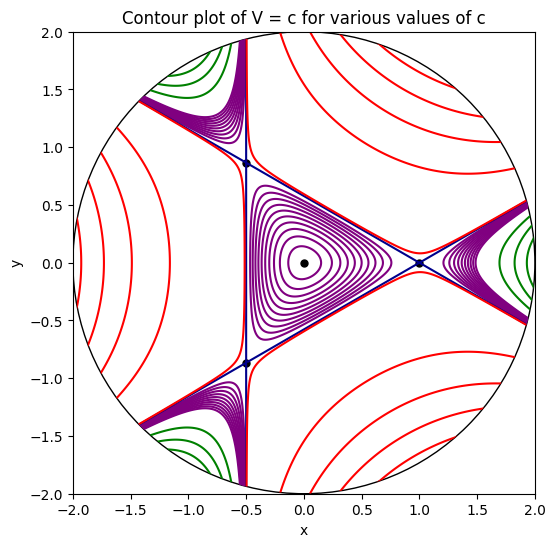

In [38]:
# Define the potential energy function V(x, y)
def V(x, y):
    return 0.5 * x**2 + 0.5 * y**2 + x * y**2 - (1/3) * x**3

# Function to draw custom contours
def draw_contours_custom(R=2, n=500):
    # Create a meshgrid of x and y values
    x = np.linspace(-R, R, n)
    y = np.linspace(-R, R, n)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the potential energy values for the meshgrid
    Z = V(X, Y)
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_facecolor('white')  
    
    # Define contour levels for different cases
    levels_c_lt_0 = np.linspace(np.min(Z), -0.01, 10, endpoint=False)
    levels_c_0_to_1_6 = np.linspace(0.01, 1/6 - 0.01, 10, endpoint=False)
    levels_c_eq_1_6 = [1/6]
    levels_c_gt_1_6 = np.linspace(1/6 + 0.01, np.max(Z), 10)
    
    # Merge all levels
    levels = np.sort(np.concatenate((levels_c_lt_0, levels_c_0_to_1_6, levels_c_eq_1_6, levels_c_gt_1_6)))
    
    # Define colours for the contour lines
    colors_c_lt_0 = ['green'] * len(levels_c_lt_0)
    colors_c_0_to_1_6 = ['purple'] * len(levels_c_0_to_1_6)
    colors_c_eq_1_6 = ['darkblue']  # Deep blue color for c = 1/6
    colors_c_gt_1_6 = ['red'] * len(levels_c_gt_1_6)
    
    # Merge all colors
    colors = colors_c_lt_0 + colors_c_0_to_1_6 + colors_c_eq_1_6 + colors_c_gt_1_6
    
    # Plot the contour lines with specified colors
    contour_plot = ax.contour(X, Y, Z, levels=levels, colors=colors)
    
    # Plot the stationary points with more emphasis
    stationary_points = [(0, 0), (1, 0), (-1/2, math.sqrt(3)/2), (-1/2, -math.sqrt(3)/2)]
    for point in stationary_points:
        ax.plot(*point, 'ko', markersize=5)  
    
    # Set the aspect ratio and limit the view to a circle of radius R
    ax.set_aspect('equal')
    
    # Create a circle of radius R to clip the contour plot
    circle = Circle((0, 0), R, transform=ax.transData, edgecolor='black', facecolor='none')
    ax.add_artist(circle)
    
    # Set clipping path to the circle 
    for collection in contour_plot.collections:
        collection.set_clip_path(circle)
    
  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Contour plot of V = c for various values of c')
    
    plt.show()


draw_contours_custom()
 
    



### 1.3 Trajectories

In this task, we investigate the trajectories of a two-dimensional dynamical system characterised by the Hénon-Heiles Hamiltonian. To do this, we simulate the system under four distinct sets of initial conditions, inputting suitable values for the positions and velocities to demonstrate various dynamical behaviours with generating the plots for each condition respectively.  
  
      
      

1. Initial Conditions: $[0.2, 0.1, 0.1, 0.1]$
- **Description:** Small energy, confined within the middle triangle.  

- **Observation:** 
  The trajectory is an elongated ellipse confined within the central triangle, suggesting low energy that doesn't allow for escape. 

2. Initial Conditions: $[-0.15, 0.15, 0.3, 0.3]$
- **Description:** Chaotic trajectory, energy close to $\frac{1}{6}$.  

- **Observation:** 
  The initial conditions suggest a position near the edge of the middle triangle and moderate velocities. The kinetic energy is higher, bringing the total energy close to the threshold of $\frac{1}{6}$,resulting in a chaotic trajectory, where the system explores regions outside the central triangle but potentially remains bound within the escape radius.

3. Initial Conditions: $[0.1, 0, 0, 0.1]$
- **Description:** Closed curve, small x and q.  

- **Observation:** 
  The trajectory is circular and very close to the center, indicative of low energy and a simple closed path. This reflects the expected outcome of a trajectory looping around the origin.

4. Initial Conditions: $[0.2, 0.1, 0.6, 0.5]$
- **Description:** Escape trajectory, $E > \frac{1}{6}$.  

- **Observation:** 
  The initial velocities are high, contributing significantly to the kinetic energy. The potential energy is also non-trivial, meaning the total energy likely exceeds the $\frac{1}{6}$. This is consistent with the prediction of an escape trajectory.



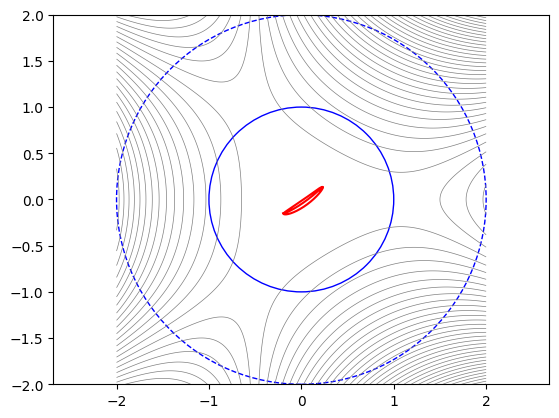

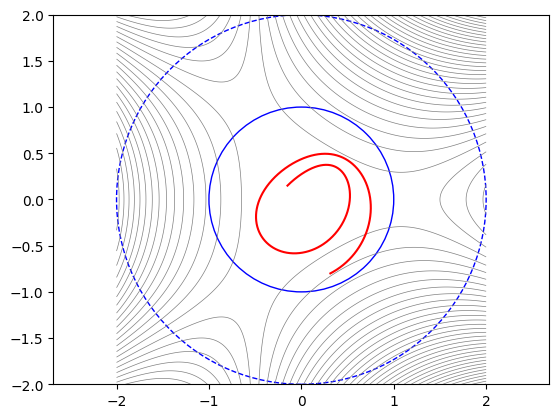

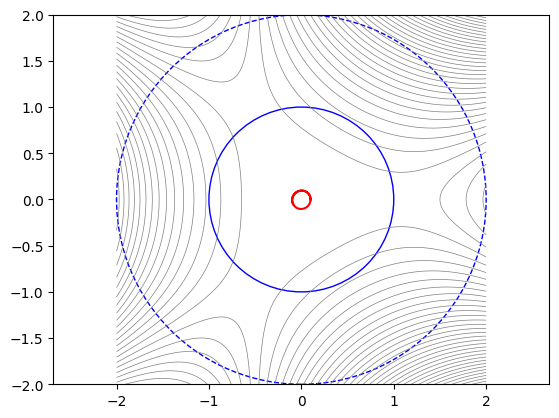

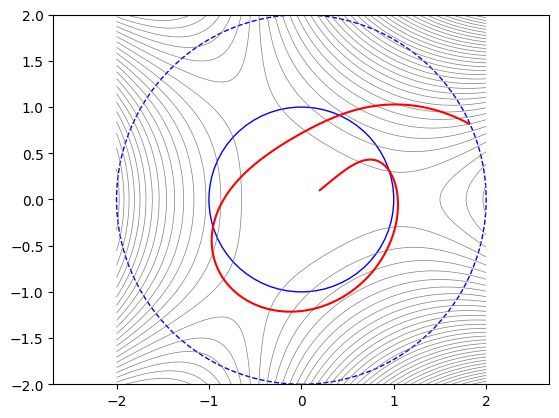

In [63]:


def V(x, y):
    """
    Calculate the Henon-Heiles potential energy at a given point in the (x, y) coordinate system.

    Parameters:
    - x (float): x-coordinate of the point.
    - y (float): y-coordinate of the point.

    Returns:
    - float: Value of the potential energy at (x, y).
    """
    return 0.5 * (x**2 + y**2) + x * y**2 - (1/3) * x**3

def escape(t, u):
    """
    Event function that defines the boundary condition for the Henon-Heiles system to determine escape.

    Parameters:
    - t (float): Current time (not used in the function itself).
    - u (list): List of current state variables [x, y, p, q].

    Returns:
    - float: Value used to determine if the system has escaped the defined boundary.
    """
    x, y, p, q = u
    return 4 - (x**2 + y**2)

# Mark the event function as terminal to stop integration when event is triggered
escape.terminal = True

def henon_heiles(t, u):
    """
    Defines the differential equations for the Henon-Heiles system.

    Parameters:
    - t (float): Time variable, not used in the equations as the system is autonomous.
    - u (list): State vector [x, y, p, q] of the system at time t.

    Returns:
    - list: Derivatives of the state vector [dx/dt, dy/dt, dp/dt, dq/dt].
    """
    x, y, p, q = u
    dxdt = p
    dydt = q
    dpdt = -x + 2 * x * y
    dqdt = -y - (x**2 - y**2)
    return [dxdt, dydt, dpdt, dqdt]

def solve(u0, t_span=[0, 10], t_eval=None, t_steps=1000):
    """
    Solves the Henon-Heiles system given initial conditions over a specified time span.

    Parameters:
    - u0 (list): Initial condition of the system [x, y, p, q].
    - t_span (list): Time interval [start, end] for the simulation.
    - t_eval (np.array): Optional specific times to record the solution.
    - t_steps (int): Number of time points to output if t_eval is not provided.

    Returns:
    - OdeResult: Object containing the times and values of the solution.
    """
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], t_steps)
    result = solve_ivp(henon_heiles, t_span, u0, t_eval=t_eval, events=[escape], rtol=1e-10, atol=1e-10)
    return result

def plot_potential_contours(ax):
    """
    Plots potential energy contours for the Henon-Heiles system on a given axis.

    Parameters:
    - ax (matplotlib.axes.Axes): Axis on which to plot the contours.
    """
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = V(X, Y)
    ax.contour(X, Y, Z, levels=40, colors='grey', linestyles='solid', linewidths=0.5)

def show_trajectory(u0):
    """
    Plots the trajectory of a particle in the Henon-Heiles system given initial conditions.

    Parameters:
    - u0 (list): Initial conditions [x, y, p, q] for the trajectory.

    Displays:
    - Plot showing the trajectory overlaid on the potential energy contours.
    """
    sol = solve(u0)
    fig, ax = plt.subplots()
    plot_potential_contours(ax)
    ax.plot(sol.y[0], sol.y[1], 'r')
    ax.add_artist(plt.Circle((0, 0), 1, color='b', fill=False))
    ax.add_artist(plt.Circle((0, 0), 2, color='b', fill=False, linestyle='dashed'))
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    plt.show()

initial_conditions_examples = [
    [0.2, 0.1, 0.1, 0.1],
    [-0.15, 0.15, 0.3, 0.3],
    [0.1, 0, 0, 0.1],
    [0.2, 0.1, 0.6, 0.5]
]

for u0 in initial_conditions_examples:
    show_trajectory(u0)



### 1.4 Escape Time

 In this task, we explore various initial conditions within specific boundaries to determine the trajectory that takes the longest time to escape a predefined region. After I set $v=0.5$ as the initial speed, the program iterates over a grid of initial positions and angles to compute the escape time for each.It prints out the 'y' coordinate, 'theta' angle, and escape time for each new record set during the computation. Additionally, the code generates a plot visualising the trajectory corresponding to the longest escape time, alongside contours of the potential field and relevant boundary markers what I have used in the Task 1.2 and 1.3.

New record: y=-0.866, theta=0.000, escape_time=8.12
New record: y=-0.866, theta=1.571, escape_time=10.91
New record: y=-0.289, theta=1.571, escape_time=11.70
New record: y=0.289, theta=4.712, escape_time=11.70


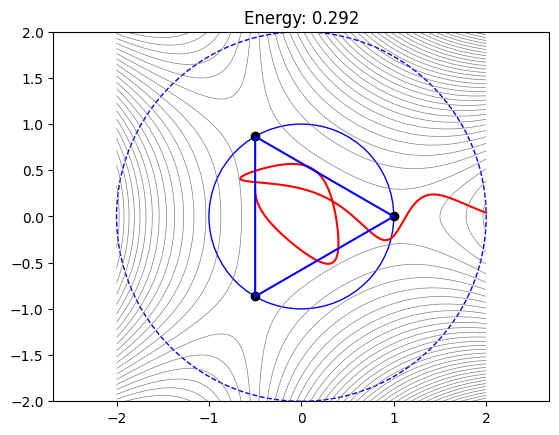

Best conditions: [-0.5, 0.28867513459481287, -9.184850993605148e-17, -0.5]


In [55]:
def V(x, y):
    """
    Calculate the Henon-Heiles potential.

    Parameters:
    x (float): The x-coordinate.
    y (float): The y-coordinate.

    Returns:
    float: The potential at point (x, y).
    """
    return 0.5 * (x**2 + y**2) + x * y**2 - (1/3) * x**3

def escape(t, u):
    """
    Event function that determines when the trajectory escapes the predefined boundary.
    
    Parameters:
    t (float): The time parameter of the trajectory.
    u (array): The current state of the system (x, y, p, q).

    Returns:
    float: The distance from the boundary, when this is zero, an event is triggered.
    """
    x, y, p, q = u
    return 4 - (x**2 + y**2)

escape.terminal = True  # Tell the solver to stop the integration if this event is triggered.

def henon_heiles(t, u):
    """
    Computes the derivatives for the Henon-Heiles system.

    Parameters:
    t (float): The time parameter (unused, as the system is time-independent).
    u (array): The current state of the system (x, y, p, q).

    Returns:
    list: The derivatives of the system [dx/dt, dy/dt, dp/dt, dq/dt].
    """
    x, y, p, q = u
    dxdt = p
    dydt = q
    dpdt = -x + x**2 - y**2
    dqdt = -y - 2*x*y
    return [dxdt, dydt, dpdt, dqdt]

def solve(u0, t_span=[0, 100], t_steps=10000):
    """
    Solves the Henon-Heiles system equations for a given initial condition.

    Parameters:
    u0 (array): The initial condition [x, y, p, q].
    t_span (list): The time span for the integration (start, end).
    t_steps (int): Number of time steps to use for the output.

    Returns:
    OdeResult: The integrated trajectory of the system.
    """
    t_eval = np.linspace(t_span[0], t_span[1], t_steps)
    result = solve_ivp(henon_heiles, t_span, u0, t_eval=t_eval, events=escape, rtol=1e-10, atol=1e-10)
    return result

def escape_time(u0):
    """
    Computes the escape time for a given initial condition of the Henon-Heiles system.

    Parameters:
    u0 (array): The initial condition [x, y, p, q].

    Returns:
    float: The time at which the system escapes or np.inf if it does not escape within the time span.
    """
    result = solve(u0)
    if result.status == 1 and result.t_events[0].size > 0:
        return result.t_events[0][0]
    else:
        return np.inf

def E(x, y, p, q):
    """
    Computes the total energy (kinetic + potential) of the Henon-Heiles system.

    Parameters:
    x (float): The x-coordinate.
    y (float): The y-coordinate.
    p (float): The momentum associated with x.
    q (float): The momentum associated with y.

    Returns:
    float: The total energy of the system.
    """
    kinetic = 0.5 * (p**2 + q**2)
    potential = V(x, y)
    return kinetic + potential

def show_trajectory(u0):
    """
    Plots the trajectory of the Henon-Heiles system for a given initial condition.

    Parameters:
    u0 (array): The initial condition [x, y, p, q].
    """
    sol = solve(u0)
    fig, ax = plt.subplots()
    plot_potential_contours(ax)
    ax.plot(sol.y[0], sol.y[1], 'r')
    ax.set_title(f"Energy: {E(sol.y[0][0], sol.y[1][0], sol.y[2][0], sol.y[3][0]):.3f}")
    ax.add_artist(plt.Circle((0, 0), 1, color='b', fill=False))
    ax.add_artist(plt.Circle((0, 0), 2, color='b', fill=False, linestyle='dashed'))
    plot_triangle(ax)
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    plt.show()

def plot_potential_contours(ax):
    """
    Plots potential contours on a given axis.

    Parameters:
    ax (matplotlib.axes.Axes): The matplotlib axis on which to plot the contours.
    """
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = V(X, Y)
    ax.contour(X, Y, Z, levels=40, colors='grey', linestyles='solid', linewidths=0.5)

def plot_triangle(ax):
    """
    Plots a triangle representing the boundary within which the Henon-Heiles system should be contained.

    Parameters:
    ax (matplotlib.axes.Axes): The matplotlib axis on which to plot the triangle.
    """
    triangle = np.array([[1, 0], [-0.5, np.sqrt(3)/2], [-0.5, -np.sqrt(3)/2], [1, 0]])
    ax.plot(triangle[:, 0], triangle[:, 1], 'b-')
    ax.scatter(triangle[:-1, 0], triangle[:-1, 1], color='black')

def find_long_trajectory(v):
    """
    Finds the initial condition that results in the longest escape time for a given velocity.

    Parameters:
    v (float): The initial velocity magnitude.

    Returns:
    array: The initial condition [x, y, p, q] that results in the longest escape time.
    """
    y_values = np.linspace(-np.sqrt(3)/2, np.sqrt(3)/2, 4)
    theta_values = np.linspace(0, 2*np.pi, 4, endpoint=False)
    max_escape_time = 0
    best_conditions = None

    for y in y_values:
        for theta in theta_values:
            p = v * np.cos(theta)
            q = v * np.sin(theta)
            initial_conditions = [-0.5, y, p, q]
            current_escape_time = escape_time(initial_conditions)
            if current_escape_time > max_escape_time:
                max_escape_time = current_escape_time
                best_conditions = initial_conditions
                print(f"New record: y={y:.3f}, theta={theta:.3f}, escape_time={current_escape_time:.2f}")

    if best_conditions:
        show_trajectory(best_conditions)

    return best_conditions

if __name__ == "__main__":
    v = 0.5  
    best_conditions = find_long_trajectory(v)
    print("Best conditions:", best_conditions)
